In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


self_attention_matrix = nn.init.xavier_uniform_(nn.Parameter(torch.empty(655, 12))).detach()


eigenvalues = torch.linalg.svdvals(self_attention_matrix)


eigenvalues = np.sort(eigenvalues)[::-1]


cumulative_singular_values_0 = np.cumsum(eigenvalues)
cumulative_singular_values_0 /= cumulative_singular_values_0[-1]



a = torch.load('./old_log/PEMS3/retrained_stemb_nodetune-42/2011/15.5118.pkl', map_location='cpu')["model_state_dict"]


self_attention_matrix = a['adaptive_params']


eigenvalues = torch.linalg.svdvals(self_attention_matrix)


eigenvalues = np.sort(eigenvalues)[::-1]


cumulative_singular_values_1 = np.cumsum(eigenvalues)
cumulative_singular_values_1 /= cumulative_singular_values_1[-1]



a = torch.load('./old_log/PEMS3/retrained_stemb_nodetune-42/2012/14.7487.pkl', map_location='cpu')["model_state_dict"]


self_attention_matrix = a['adaptive_params']

eigenvalues = torch.linalg.svdvals(self_attention_matrix)


eigenvalues = np.sort(eigenvalues)[::-1]


cumulative_singular_values_2 = np.cumsum(eigenvalues)
cumulative_singular_values_2 /= cumulative_singular_values_2[-1]




a = torch.load('./old_log/PEMS3/retrained_stemb_nodetune-42/2013/15.1124.pkl', map_location='cpu')["model_state_dict"]


self_attention_matrix = a['adaptive_params']

eigenvalues = torch.linalg.svdvals(self_attention_matrix)


eigenvalues = np.sort(eigenvalues)[::-1]


cumulative_singular_values_3 = np.cumsum(eigenvalues)
cumulative_singular_values_3 /= cumulative_singular_values_3[-1]



a = torch.load('./old_log/PEMS3/retrained_stemb_nodetune-42/2014/16.2767.pkl', map_location='cpu')["model_state_dict"]


self_attention_matrix = a['adaptive_params']

eigenvalues = torch.linalg.svdvals(self_attention_matrix)

# 按降序排列
eigenvalues = np.sort(eigenvalues)[::-1]

# 归一化累积奇异值
cumulative_singular_values_4 = np.cumsum(eigenvalues)
cumulative_singular_values_4 /= cumulative_singular_values_4[-1]


a = torch.load('./old_log/PEMS3/retrained_stemb_nodetune-42/2015/15.3882.pkl', map_location='cpu')["model_state_dict"]


self_attention_matrix = a['adaptive_params']

eigenvalues = torch.linalg.svdvals(self_attention_matrix)

# 按降序排列
eigenvalues = np.sort(eigenvalues)[::-1]

# 归一化累积奇异值
cumulative_singular_values_5 = np.cumsum(eigenvalues)
cumulative_singular_values_5 /= cumulative_singular_values_5[-1]



a = torch.load('./old_log/PEMS3/retrained_stemb_nodetune-42/2016/14.9713.pkl', map_location='cpu')["model_state_dict"]


self_attention_matrix = a['adaptive_params']

eigenvalues = torch.linalg.svdvals(self_attention_matrix)

# 按降序排列
eigenvalues = np.sort(eigenvalues)[::-1]

# 归一化累积奇异值
cumulative_singular_values_6 = np.cumsum(eigenvalues)
cumulative_singular_values_6 /= cumulative_singular_values_6[-1]



a = torch.load('./old_log/PEMS3/retrained_stemb_nodetune-42/2017/16.8595.pkl', map_location='cpu')["model_state_dict"]


self_attention_matrix = a['adaptive_params']

eigenvalues = torch.linalg.svdvals(self_attention_matrix)

# 按降序排列
eigenvalues = np.sort(eigenvalues)[::-1]

# 归一化累积奇异值
cumulative_singular_values_7 = np.cumsum(eigenvalues)
cumulative_singular_values_7 /= cumulative_singular_values_7[-1]

In [5]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams["font.family"] = "Times New Roman"

def calculate_spectrum_value(X, index):
    eigenvalues = torch.linalg.svdvals(X)

    # 按降序排列
    eigenvalues = np.sort(eigenvalues)[::-1]

    # 归一化累积奇异值
    cumulative_singular_values = np.cumsum(eigenvalues)
    cumulative_singular_values /= cumulative_singular_values[-1]
    return cumulative_singular_values[index-1]

spect_mat = np.zeros(shape=(7, 5))
for idx, year in enumerate([2011, 2012, 2013, 2014, 2015, 2016, 2017]):
    for root, dirs, files in os.walk(f'./old_log/PEMS3/retrained_stemb_nodetune-42/{year}'):
        for idy, file in enumerate(sorted(files, reverse=True)):
            file_path = os.path.join(root, file)

            a = torch.load(file_path, map_location='cpu')["model_state_dict"]

            X = a['adaptive_params']

            # X = nn.init.uniform_(nn.Parameter(torch.empty(655, 12)), -0.1, 0.1).detach().numpy()
            
            spectrum_value = calculate_spectrum_value(X, index=6)
            print("spectrum:", spectrum_value)
            if idy < 5:
                spect_mat[idx, idy] = spectrum_value
    print('*'*100)

spectrum: 0.84913695
spectrum: 0.86367834
spectrum: 0.87262434
spectrum: 0.87398785
spectrum: 0.87663615
spectrum: 0.87790525
spectrum: 0.8776787
spectrum: 0.87836576
spectrum: 0.87265617
spectrum: 0.8650885
spectrum: 0.8616793
spectrum: 0.8593724
spectrum: 0.85711133
spectrum: 0.8463217
spectrum: 0.8379145
spectrum: 0.835633
spectrum: 0.8309494
spectrum: 0.82834035
spectrum: 0.8278399
spectrum: 0.82690865
****************************************************************************************************
spectrum: 0.8068864
spectrum: 0.8033517
spectrum: 0.80073595
spectrum: 0.7987217
spectrum: 0.79655236
spectrum: 0.79546374
spectrum: 0.79348296
spectrum: 0.7925319
spectrum: 0.79119474
spectrum: 0.7894721
spectrum: 0.783597
****************************************************************************************************
spectrum: 0.7804095
spectrum: 0.77832055
spectrum: 0.7782039
spectrum: 0.77668583
spectrum: 0.77653265
spectrum: 0.77399683
spectrum: 0.7729907
spectrum: 0.76865166

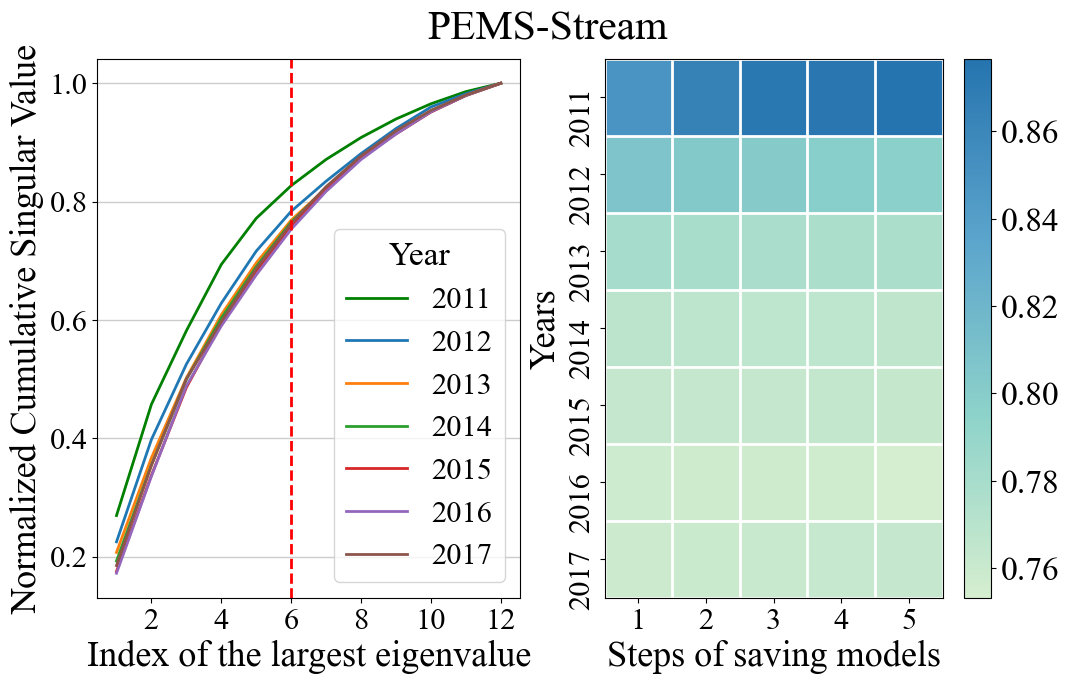

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))


plt.subplot(1, 2, 1)
plt.grid(color='gray', linestyle='-', linewidth=1.0, axis='y', alpha=0.4)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_singular_values_1, label='2011', color='green', linewidth=2)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_singular_values_2, label='2012', linewidth=2)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_singular_values_3, label='2013', linewidth=2)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_singular_values_4, label='2014', linewidth=2)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_singular_values_5, label='2015', linewidth=2)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_singular_values_6, label='2016', linewidth=2)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_singular_values_7, label='2017', linewidth=2)
# plt.plot(range(1, len(eigenvalues) + 1), cumulative_singular_values_0, label='Random', color='gray')
plt.xlabel('Index of the largest eigenvalue', fontsize=26)
plt.ylabel('Normalized Cumulative Singular Value', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.title('Spectrum Analysis of Matrix')

plt.axvline(x=6, color='red', linestyle='--', linewidth=2)
plt.legend(title='Year', loc='best', fontsize=22, title_fontsize=24)



plt.subplot(1, 2, 2)
plt.imshow(spect_mat, cmap=LinearSegmentedColormap.from_list('custom_cmap', ['#d5eecf', '#8ed3ca', '#5ba4cc', '#2674af']), interpolation='nearest', aspect='auto')
plt.xlabel('Steps of saving models', fontsize=26)
plt.ylabel('Years', fontsize=26)
plt.yticks(np.linspace(0, spect_mat.shape[0] - 1, 7), labels=np.arange(2011, 2018), rotation=90, fontsize=22)
plt.xticks(np.linspace(0, spect_mat.shape[1] - 1, 5), labels=np.arange(1, 6), fontsize=22)

for i in range(spect_mat.shape[0]+1):
    plt.axhline(i - 0.5, color='white', linewidth=2)
for j in range(spect_mat.shape[1]+1):
    plt.axvline(j - 0.5, color='white', linewidth=2)
cbar =plt.colorbar()
cbar.ax.tick_params(labelsize=24)

plt.suptitle('PEMS-Stream', fontsize=30, y=0.95)

# plt.show()
plt.savefig('compress_study.pdf', dpi=600, bbox_inches='tight')

In [117]:
import numpy as np
import torch
import torch.nn as nn
import os

def calculate_average_distance(X):
    
    # distances = np.sqrt(np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=2))
    distances = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=2)
    
    # XXT = np.dot(X, X.T)
    
    
    # diag_X = np.diag(XXT)
    
    
    # distances_squared = diag_X[:, np.newaxis] + diag_X[np.newaxis, :] - 2 * XXT
    
    
    # distances = np.sqrt(np.maximum(distances_squared, 0))
    # print(distances)
    
    average_distance = np.mean(distances)
    return average_distance


# average_distance = calculate_average_distance(X)
# print("Average feature difference between nodes:", average_distance)

for year in [2011, 2012, 2013, 2014, 2015, 2016, 2017]:
    print(year)
    for root, dirs, files in os.walk(f'./log/PEMS/eac-42/{year}'):
        for file in sorted(files, reverse=True):
            file_path = os.path.join(root, file)

            a = torch.load(file_path, map_location='cpu')["model_state_dict"]

            X = torch.mm(a['U'], a['V']).detach().numpy()

            # X = nn.init.uniform_(nn.Parameter(torch.empty(655, 12)), -0.1, 0.1).detach().numpy()
            
            average_distance = calculate_average_distance(X)
            print("Average feature difference between nodes:", average_distance)
    print('*'*100)

2011
Average feature difference between nodes: 0.545284
Average feature difference between nodes: 0.68207747
Average feature difference between nodes: 0.82817936
Average feature difference between nodes: 1.0308762
Average feature difference between nodes: 1.1665319
Average feature difference between nodes: 1.165952
Average feature difference between nodes: 1.2822877
Average feature difference between nodes: 1.7002659
Average feature difference between nodes: 2.4438946
Average feature difference between nodes: 4.4445786
Average feature difference between nodes: 5.262633
Average feature difference between nodes: 6.9545755
Average feature difference between nodes: 7.5709534
Average feature difference between nodes: 8.414893
Average feature difference between nodes: 10.082895
Average feature difference between nodes: 11.134682
Average feature difference between nodes: 13.523245
****************************************************************************************************
2012
Average

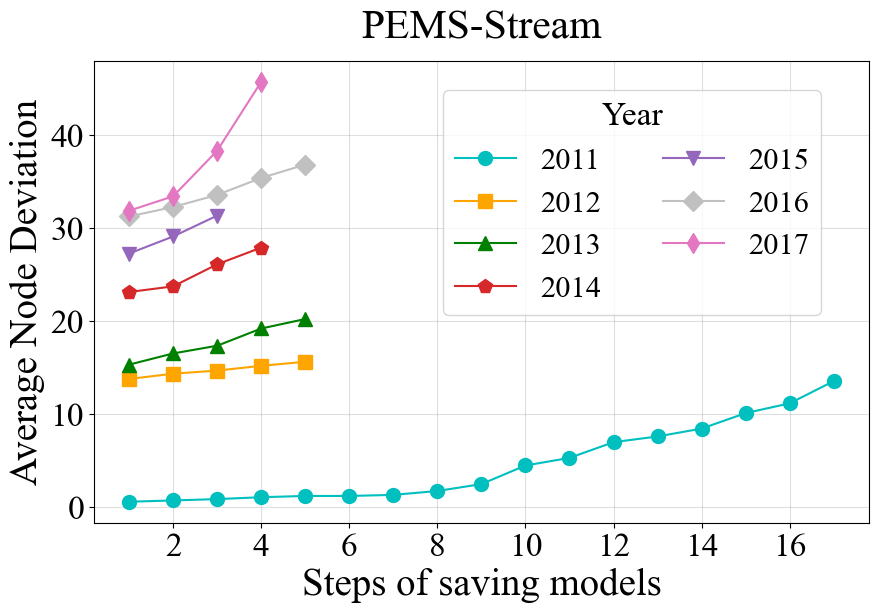

In [19]:
import matplotlib.pyplot as plt


data = {
    2011: [0.545284, 0.68207747, 0.82817936, 1.0308762, 1.1665319, 1.165952, 1.2822877, 1.7002659, 2.4438946, 4.4445786, 5.262633, 6.9545755, 7.5709534, 8.414893, 10.082895, 11.134682, 13.523245],
    2012: [13.758088, 14.327156, 14.663011, 15.173429, 15.612196],
    2013: [15.302291, 16.507215, 17.337008, 19.19231, 20.212318],
    2014: [23.119593, 23.729631, 26.101252, 27.902407],
    2015: [27.260468, 29.100735, 31.345818],
    2016: [31.256258, 32.267223, 33.57677, 35.398277, 36.83795],
    2017: [31.873705, 33.42326, 38.332405, 45.755775]
}



markers = ['o', 's', '^', 'p', 'v', 'D', 'd']


plt.figure(figsize=(10, 6))


for i, (year, values) in enumerate(data.items()):
    if i ==0:
        plt.plot(range(1, len(values) + 1), values, marker=markers[i % len(markers)], label=f'{year}', markersize=10, color='c')
    elif i ==1:
        plt.plot(range(1, len(values) + 1), values, marker=markers[i % len(markers)], label=f'{year}', markersize=10, color='orange')
    elif i==2:
        plt.plot(range(1, len(values) + 1), values, marker=markers[i % len(markers)], label=f'{year}', markersize=10, color='green')
    elif i ==3:
        plt.plot(range(1, len(values) + 1), values, marker=markers[i % len(markers)], label=f'{year}', markersize=10, color='#d62729')
    elif i==4:
        plt.plot(range(1, len(values) + 1), values, marker=markers[i % len(markers)], label=f'{year}', markersize=10, color='#9467bd')
    elif i==5:
        plt.plot(range(1, len(values) + 1), values, marker=markers[i % len(markers)], label=f'{year}', markersize=10, color='silver')
    elif i==6:
        plt.plot(range(1, len(values) + 1), values, marker=markers[i % len(markers)], label=f'{year}', markersize=10, color='#e377c2')


plt.title('PEMS-Stream', fontsize=30, y=1.03)
plt.xlabel('Steps of saving models', fontsize=28)
plt.ylabel('Average Node Deviation', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(title='Year', loc=(0.45,0.45), ncol=2, fancybox=True, fontsize=22, title_fontsize=24)

# 显示网格线
plt.grid(True, alpha=0.4)

# 保存图表
plt.savefig('expand_study.pdf', dpi=600, bbox_inches='tight')